### MCD - Gustavo Vazquez
# Ejercicio de Machine Learning: Ejemplo de Regresión Lineal con Datos Sintéticos

## Objetivo
El objetivo de este ejercicio es construir un modelo de regresión lineal simple que prediga un valor objetivo (target) a partir de una característica (feature). Utilizaremos datos sintéticos generados artificialmente para este propósito.

##Descripción del Ejemplo
Vamos a generar un conjunto de datos sintéticos siguiendo una relación lineal con un cierto grado de ruido. El modelo tiene un feature (variable independiente) y un target (variable dependiente). Posteriormente, separaremos estos datos en conjuntos de entrenamiento y validación.

Importanción inicial de librerías


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd


**Paso 1**: Generación de Datos Sintéticos

In [4]:
# Fijar la semilla para reproducibilidad
semilla = 42
np.random.seed(semilla)

# Generar datos sintéticos
n_samples = 100
X = 2 * np.random.rand(n_samples, 1)  # feature: valores entre 0 y 2
y = 4 + 3 * X + np.random.randn(n_samples, 1)  # Target: relación lineal con ruido

# Visualizar los datos generados
plt.scatter(X, y)
plt.xlabel('X - variable independiente')
plt.ylabel('y - variable dependiente')
plt.title('Datos Sintéticos')
plt.show()



NameError: name 'np' is not defined

💡Explicación para construir el gráfico:

- `plt.scatter(X, y)`:
  - Esta línea crea un gráfico de dispersión (scatter plot) con los datos proporcionados.
  - X representa los valores en el eje X (variable independiente o feature o característica).
  - y representa los valores en el eje Y (variable dependiente o target u objetivo).
  - Los puntos en el gráfico muestran la relación entre X y y.

- `plt.xlabel('X - variable independiente')`:
  - Esta línea establece la etiqueta del eje X del gráfico.

  - La etiqueta 'X' aparecerá junto al eje X, indicando qué representa este eje.
- `plt.ylabel('y - variable dependiente')`:

  - Esta línea establece la etiqueta del eje Y del gráfico.
  - La etiqueta 'y' aparecerá junto al eje Y, indicando qué representa este eje.
- `plt.title('Datos Sintéticos')`:
  - Esta línea establece el título del gráfico.
  - El título 'Datos Sintéticos' aparecerá en la parte superior del gráfico, proporcionando una descripción general de lo que muestra el gráfico.
- `plt.show()`:

  - Esta línea muestra el gráfico.
  - Hasta que se llama a plt.show(), el gráfico se crea en memoria pero no se muestra en la pantalla.
  - Al ejecutar `plt.show()`, el gráfico se renderiza y se presenta en una ventana o en la salida gráfica configurada (por ejemplo, en un notebook de Jupyter).

**Paso 2**: Separación de Datos en Conjuntos de Entrenamiento y Validación
Dividimos los datos en conjuntos de entrenamiento (80%) y validación (20%):

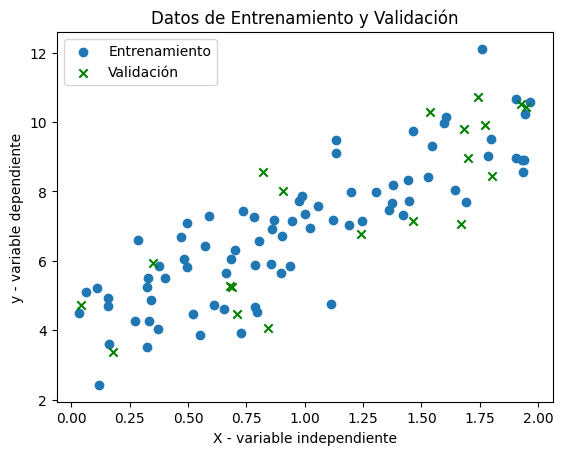

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=semilla)
# Crear el gráfico
plt.scatter(X_train, y_train, label='Entrenamiento')
plt.scatter(X_val, y_val, color='green', marker='x', label='Validación')
plt.xlabel('X - variable independiente')
plt.ylabel('y - variable dependiente')
plt.title('Datos de Entrenamiento y Validación')
plt.legend()
plt.show()

💡Explicación para construir el gráfico:
- `plt.scatter`:
  - `color='green'`:

    - Este argumento opcional establece el color de los puntos en el gráfico de dispersión. En este caso, todos los puntos del conjunto de validación serán de color verde (si no se especifica se utiliza el azul).
  - `marker='x'`:
    - Este argumento opcional establece la forma de los marcadores en el gráfico de dispersión. 'x' indica que cada punto se mostrará como una cruz (si no se especifica se utiliza el círculo lleno).
- `plt.legend()`: en matplotlib se utiliza para añadir una leyenda al gráfico. Esta leyenda proporciona información sobre los elementos gráficos presentes en el gráfico, como líneas, puntos o áreas, identificándolos con etiquetas descriptivas.

**Paso 3**: Entrenamiento del Modelo de Regresión Lineal
Entrenamos un modelo de regresión lineal con los datos de entrenamiento:


In [ ]:
# Crear el modelo de regresión lineal
lin_reg = LinearRegression()

# Entrenar el modelo
lin_reg.fit(X_train, y_train)

# Coeficientes del modelo
# Coeficientes del modelo
intercept = lin_reg.intercept_[0]
coef = lin_reg.coef_[0][0]
print(f"Coeficiente del término independiente (intercept): {intercept:.2f}")
print(f"Coeficiente de Pendiente (coef): {coef:.2f}")


Coeficiente del término independiente (intercept): 3.95
Coeficiente de Pendiente (coef): 3.02


💡Explicación:
- `lin_reg = LinearRegression()`:
  - Esta línea crea una instancia del modelo de regresión lineal de la biblioteca scikit-learn.
  - `LinearRegression()` es una clase que implementa la regresión lineal ordinaria.
  - `lin_reg` es el objeto que representa este modelo de regresión lineal.

- `lin_reg.fit(X_train, y_train)`:
  - fit es un método del objeto lin_reg que entrena el modelo utilizando los datos proporcionados.
  - X_train es el conjunto de características de entrenamiento.
  - y_train es el conjunto de valores objetivo correspondiente.
  - Durante este proceso, el modelo ajusta los coeficientes de la regresión lineal (intercepto y pendientes) para minimizar el error entre las predicciones del modelo y los valores reales en los datos de entrenamiento.
- `intercept = lin_reg.intercept_[0]`:
  - intercept_ es un atributo del modelo lin_reg que contiene el término independiente (intercepto) de la regresión lineal.
  - [0] se usa para acceder al primer (y único) valor del atributo, ya que intercept_ es devuelto como un array.
  - intercept es el valor del término independiente del modelo, es decir, el punto en el que la línea de regresión cruza el eje Y cuando todas las características son cero.
- `coef = lin_reg.coef_[0][0]`:
  - coef_ es un atributo del modelo lin_reg que contiene los coeficientes de las características del modelo (las pendientes de la línea de regresión).
  - [0][0] se usa para acceder al primer (y único) valor del array, ya que coef_ es devuelto como un array bidimensional.
  - coef es el coeficiente que representa la pendiente de la línea de regresión, es decir, el cambio en el valor objetivo por unidad de cambio en la característica (en general es de dimensión (#targets, #features).

**Paso 4**: Evaluación del Modelo
Evaluamos el modelo utilizando el conjunto de validación y calculamos el error cuadrático medio (MSE):

In [2]:
# Predicciones en el conjunto de validación
y_val_pred = lin_reg.predict(X_val)

# Calcular el MSE
mse = mean_squared_error(y_val, y_val_pred)
print(f"Error Cuadrático Medio (MSE) en validación: {mse}")

# Visualizar los resultados
plt.scatter(X_val, y_val, label='Datos reales')
plt.plot(X_val, y_val_pred, color='red', label='Predicciones')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Lineal - Validación')
plt.legend()
plt.show()


NameError: name 'lin_reg' is not defined

In [3]:
# Crear la tabla de datos de validación con predicciones y errores
val_data = {
    'X': X_val.flatten(),
    'y': y_val.flatten(),
    'y_pred': y_val_pred.flatten(),
    'error': y_val.flatten() - y_val_pred.flatten()
}
val_df = pd.DataFrame(val_data)

# Mostrar la tabla
print(val_df.head(val_df.shape[0]))



NameError: name 'X_val' is not defined